## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [ ]:
# Q1.1 Run the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

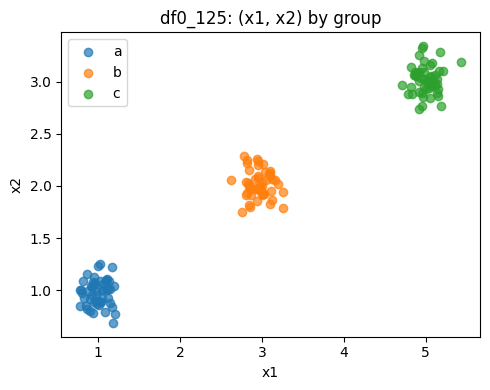

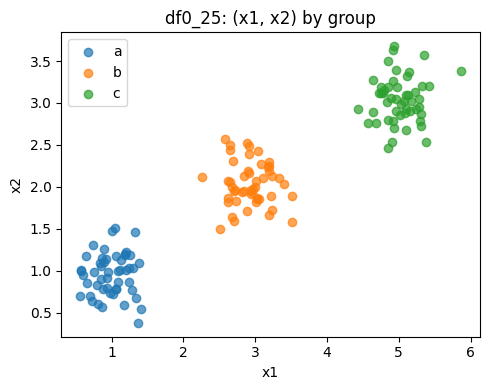

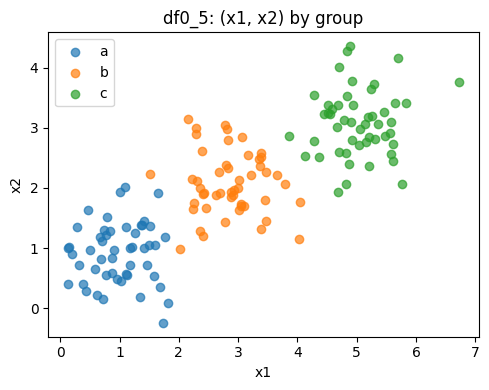

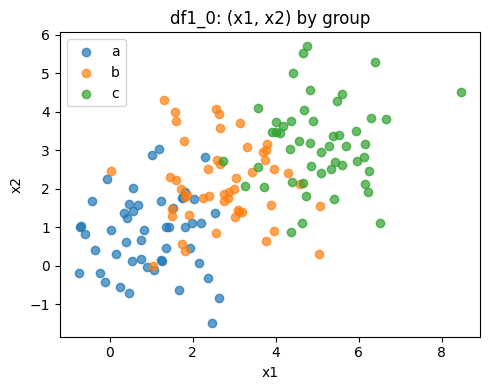

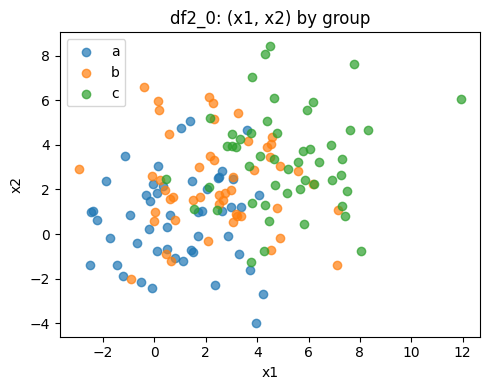

In [ ]:
# Q1.2 Make scatterplots
datasets = {
    "df0_125": df0_125,
    "df0_25": df0_25,
    "df0_5": df0_5,
    "df1_0": df1_0,
    "df2_0": df2_0
}

for name, df in datasets.items():
    plt.figure(figsize=(5, 4))
    for g in df["group"].unique():
        sub = df[df["group"] == g]
        plt.scatter(sub["x1"], sub["x2"], alpha=0.7, label=g)
    plt.title(f"{name}: (x1, x2) by group")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

As the noise rises from 0.125 to 2.0, the scatter plot go from tight and clearly separate to more scattered across the graph.

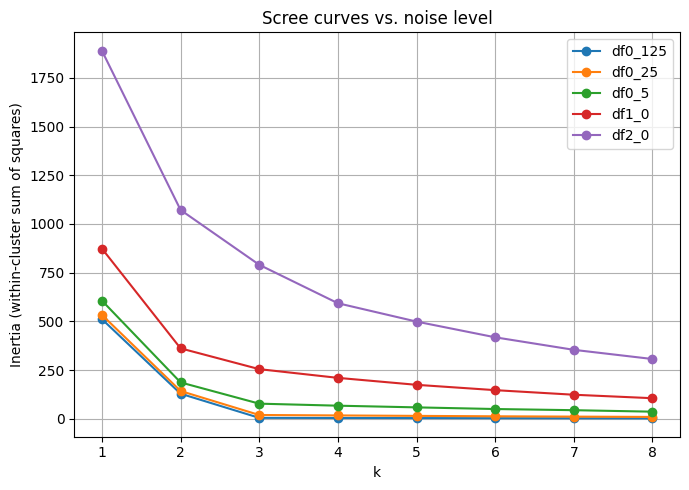

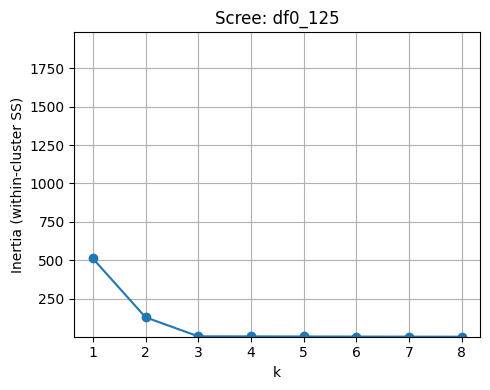

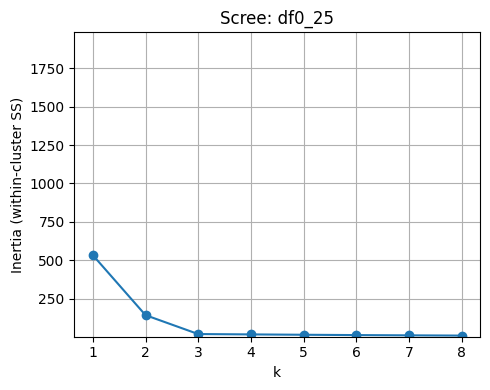

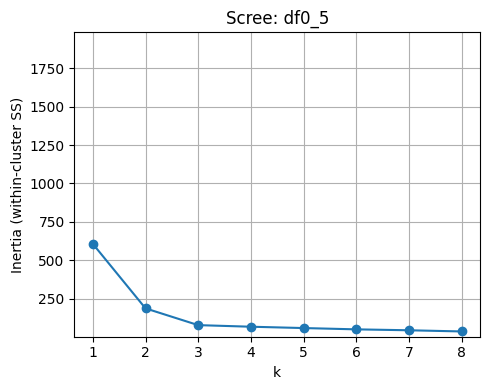

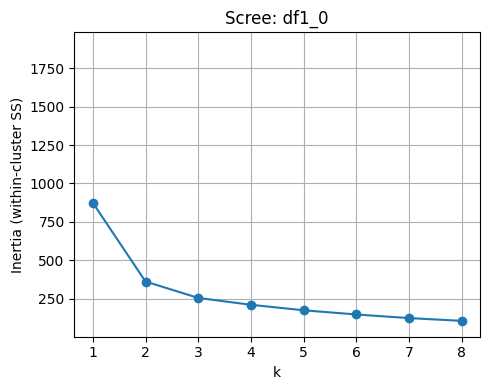

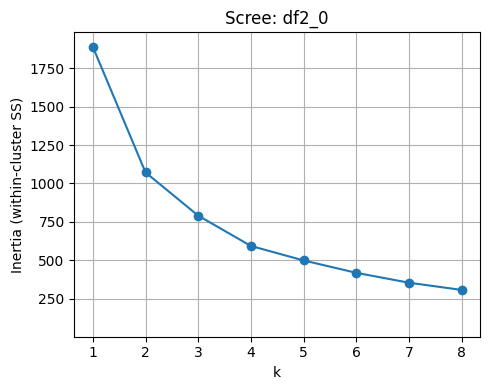

In [ ]:
# Q1.3 Scree plot
def scree(df, max_k=8, random_state=42):
    X = df[["x1","x2"]].to_numpy()
    inertias = []
    for k in range(1, max_k+1):
        km = KMeans(n_clusters=k, n_init=20, random_state=random_state)
        km.fit(X)
        inertias.append(km.inertia_)
    return inertias

ks = list(range(1, 9))

# Combined scree
plt.figure(figsize=(7,5))
all_inertias = {} # Initialize all_inertias dictionary
for label, df in datasets.items():
    current_inertias = scree(df) # Calculate inertias for the current dataset
    plt.plot(ks, current_inertias, marker="o", label=label)
    all_inertias[label] = current_inertias # Store inertias in the dictionary
plt.title("Scree curves vs. noise level")
plt.xlabel("k"); plt.ylabel("Inertia (within-cluster sum of squares)")
plt.xticks(ks); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# One scree plot per dataset
ymax = max(max(v) for v in all_inertias.values())
ymin = min(min(v) for v in all_inertias.values())

for name, vals in all_inertias.items():
    plt.figure(figsize=(5,4))
    plt.plot(ks, vals, marker="o")
    plt.title(f"Scree: {name}")
    plt.xlabel("k"); plt.ylabel("Inertia (within-cluster SS)")
    plt.xticks(ks); plt.grid(True)
    plt.ylim(ymin * 0.95, ymax * 1.05)   # keep vertical scale consistent
    plt.tight_layout(); plt.show()

With low noise there is a sharp elbow around k = 3 and inertia is small, so picking k=3 is easy.
With medium noise (0.5–1.0) the elbow is weaker and inertia is higher, so k=3 still fits but is less obvious.
With high noise (2.0) the curve is smooth with no clear elbow and very high inertia, making a single best k hard to choose.

In [ ]:
# Q1.4 Explain the intuition of the elbow

Adding more clusters always lowers the error, but the big drops stop once you reach the real number of groups. After that, extra clusters only trim noise and the curve flattens.

In this simulation the big drop stops near k=3 when data are clean; as noise grows, the signal is hidden, the curve smooths, and the elbow disappears.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [39]:
# Q2.1 Load dataset and clean it
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

# Load and clean the dataset
df = pd.read_csv('/content/2022 election cycle fundraising.csv')

# Define columns
ID_COL = 'Member'
money_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']

# Helper to coerce money to numeric
def money_to_float(s):
    if pd.isna(s):
        return np.nan
    # Handle cases where input is already a number (int or float)
    if isinstance(s, (int, float)):
        return float(s)

    s = str(s).strip()
    if s == "" or s.lower() in {"nan", "na", "none"}:
        return np.nan
    neg = False
    if s.startswith("(") and s.endswith(")"):
        neg = True
        s = s[1:-1]
    s = s.replace("$", "").replace(",", "").replace("+", "").strip()
    try:
        val = float(s)
    except Exception:
        # try to pull any number from the string
        m = re.search(r"-?\d+(\.\d+)?", s)
        val = float(m.group()) if m else np.nan
    return -val if neg else val

df = df.copy()
for c in money_cols:
    df[c] = df[c].map(money_to_float)

# Drop rows with all-NaN money fields
df_money = df.dropna(subset=money_cols, how="all").reset_index(drop=True)

# Show total rows and columns
print("Shape (rows, columns):", df_money.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
print(df_money.head())

# Check for any remaining NAs in the money columns
print("\nMissing values per money column:")
print(df_money[money_cols].isna().sum())

Shape (rows, columns): (537, 9)

First 5 rows:
   index              Member       Party       State Chamber      Raised  \
0      0  Abigail Spanberger  Democratic    Virginia   House   7719396.0   
1      1      Adam Kinzinger  Republican    Illinois   House   2192741.0   
2      2         Adam Schiff  Democratic  California   House  20993041.0   
3      3          Adam Smith  Democratic  Washington   House   1211111.0   
4      4        Adrian Smith  Republican    Nebraska   House   1617611.0   

        Spent  Cash on Hand  Debts  
0   7449678.0      851851.0    0.0  
1   1243502.0     2472888.0    0.0  
2  13957854.0    20942888.0    0.0  
3   1173466.0      623472.0    0.0  
4   1664674.0     1098579.0    0.0  

Missing values per money column:
Raised          0
Spent           0
Cash on Hand    0
Debts           0
dtype: int64


I picked the four money columns (Raised, Spent, Cash on Hand, Debts), and converted every dollar string to a real number. The cleaner removes dollar signs, commas, and plus signs, treats values in parentheses as negatives, and turns blanks or “NA” into missing values. If a value is already numeric, it is kept. I also drop rows where all four money fields are missing, leaving a cleaned table (df_money) ready for normalization and clustering.

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt

def scree(df, cols, max_k=10, random_state=42, scale=True):
    A = df.dropna(subset=cols)[cols].to_numpy()
    if scale:
        A = minmax_scale(A)
    inertias = []
    for k in range(1, max_k+1):
        km = KMeans(n_clusters=k, n_init=50, random_state=random_state).fit(A)
        inertias.append(km.inertia_)
    return inertias

def run_pair_multi_k(df_in, cols, title_prefix, k_list, seed=42):
    d = df_in.dropna(subset=cols).copy()
    X = minmax_scale(d[cols].to_numpy())

    # Scree on the same scaled data
    ks = range(1, 11)
    inertias = scree(d, cols, max_k=10, random_state=seed, scale=True)
    plt.figure(figsize=(6,4))
    plt.plot(list(ks), inertias, marker="o")
    plt.title(f"Scree: {title_prefix} {cols}")
    plt.xlabel("k"); plt.ylabel("Inertia"); plt.grid(True); plt.tight_layout(); plt.show()

    results = {}
    for k in k_list:
        km = KMeans(n_clusters=k, n_init=50, random_state=seed).fit(X)
        labels = km.labels_
        results[k] = {"labels": labels, "centers": km.cluster_centers_}

        plt.figure(figsize=(5,4))
        plt.scatter(X[:,0], X[:,1], c=labels, alpha=0.85)
        plt.title(f"{title_prefix} {cols} — k={k}")
        plt.xlabel(cols[0] + " (min–max)")
        plt.ylabel(cols[1] + " (min–max)")
        plt.tight_layout(); plt.show()
    return results

def list_smallest_two_clusters(df_in, cols, k, seed=42):
    """Fit KMeans on min–max scaled cols and print the members in the two smallest clusters."""
    d = df_in.dropna(subset=cols).copy()
    X = minmax_scale(d[cols].to_numpy())

    km = KMeans(n_clusters=k, n_init=50, random_state=seed).fit(X)
    labels = km.labels_
    d = d.assign(cluster=labels)

    # cluster sizes
    sizes = d['cluster'].value_counts().sort_values()
    print(f"\nCluster sizes for {cols} (k={k}):")
    print(sizes.to_frame('size'))

    # pick the two smallest clusters
    smallest = sizes.index[:2].tolist()
    subset = d[d['cluster'].isin(smallest)][[ID_COL] + cols + ['cluster']].sort_values('cluster')

    print(f"\nMembers in the two smallest clusters for {cols} (k={k}):")
    print(subset.to_string(index=False))

    return subset, sizes

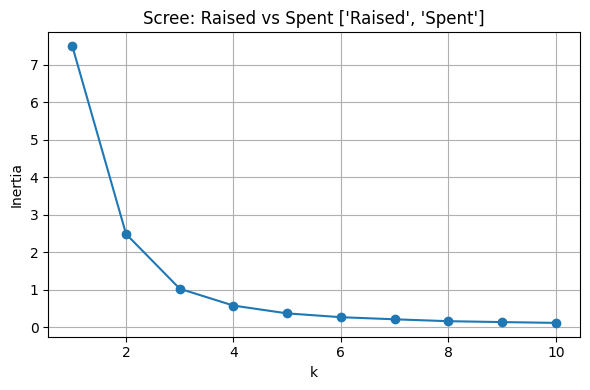

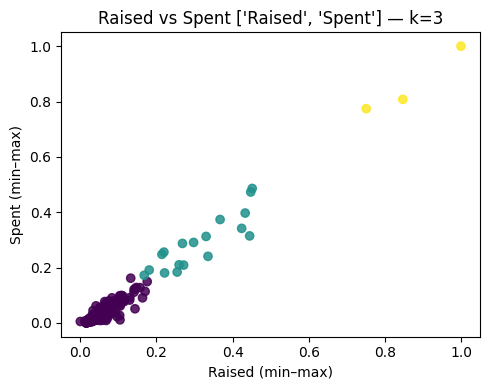


Cluster sizes for ['Raised', 'Spent'] (k=3):
         size
cluster      
2           3
1          18
0         516

Members in the two smallest clusters for ['Raised', 'Spent'] (k=3):
                Member     Raised      Spent  cluster
           Adam Schiff 20993041.0 13957854.0        1
Catherine Cortez Masto 37993811.0 35928936.0        1
         Chuck Schumer 35899966.0 25944350.0        1
          Dan Crenshaw 14535870.0 14512435.0        1
          John Kennedy 28119082.0 18276565.0        1
          Katie Porter 21441693.0 15946876.0        1
        Kevin McCarthy 24791538.0 22086344.0        1
         Maggie Hassan 30914830.0 28380992.0        1
           Marco Rubio 36709285.0 30153111.0        1
        Michael Bennet 18086343.0 13713611.0        1
          Nancy Pelosi 22216583.0 21814643.0        1
          Patty Murray 13377243.0 13073248.0        1
           Ron Johnson 27680901.0 23731653.0        1
             Rand Paul 22490627.0 15865010.0        1
     

In [41]:
# Q2.2 Max-min normalize Raised and Spent
res_rs = run_pair_multi_k(df_money, ['Raised','Spent'], "Raised vs Spent", k_list=[3])
cluster = list_smallest_two_clusters(df_money, ['Raised','Spent'], k=3)

After scaling, points line up on a near-diagonal. Campaigns mostly spend what they raise. The elbow in the scree plot at k ≈ 3 fits three groups. There is a big cluster of low-budget races, a mid-tier group, and a few very high-money Senate contests. The smallest cluster is cluster 2 (3 people), with Raphael Warnock, Mark Kelly, Val Demings. The second smallest cluster is cluster 1 (18 people), which are high-fundraising senators and representatives.

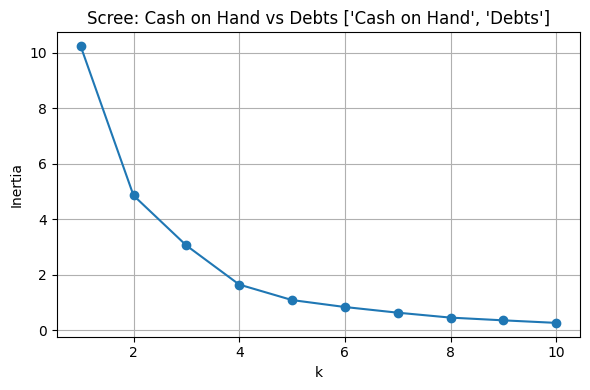

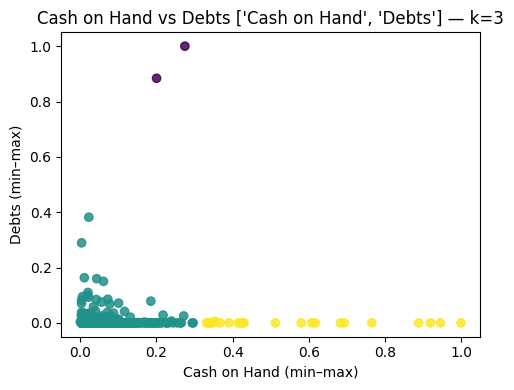


Cluster sizes for ['Cash on Hand', 'Debts'] (k=3):
         size
cluster      
0           2
2          24
1         511

Members in the two smallest clusters for ['Cash on Hand', 'Debts'] (k=3):
             Member  Cash on Hand      Debts  cluster
        David Trone     6206371.0 13302000.0        0
        Ron Johnson     4508581.0 11759857.0        0
     Bernie Sanders     9751125.0        0.0        2
        Adam Schiff    20942888.0        0.0        2
      Chuck Schumer    20231213.0        0.0        2
        Cory Booker     7671026.0        0.0        2
         Jim Jordan     8855217.0        0.0        2
       Alex Padilla     7617654.0     5703.0        2
       John Kennedy    15530074.0        0.0        2
         John Thune    17419927.0        0.0        2
    Josh Gottheimer    14024163.0        0.0        2
       Katie Porter    15762568.0        0.0        2
     Kevin McCarthy     7507326.0        0.0        2
     Kyrsten Sinema     7876875.0        0.0   

In [42]:
# Q2.3 For Cash on Hand and Debts
res_cd = run_pair_multi_k(
    df_money,
    ['Cash on Hand', 'Debts'],
    "Cash on Hand vs Debts",
    k_list=[3]
)

cluster1 = list_smallest_two_clusters(df_money, ['Cash on Hand','Debts'], k=3)

Most candidates show almost no debt, so the scatter hugs the zero-debt axis. A few outliers either hold huge cash or big loans. With k = 3, the two smallest clusters are cluster 0 (2 people, high-debt), with David Trone and Ron Johnson, and cluster 2 (24 people, high-cash/low-debt group), including Adam Schiff, Chuck Schumer, and Tim Scott. This looks different from Raised-Spent because debt use varies widely.

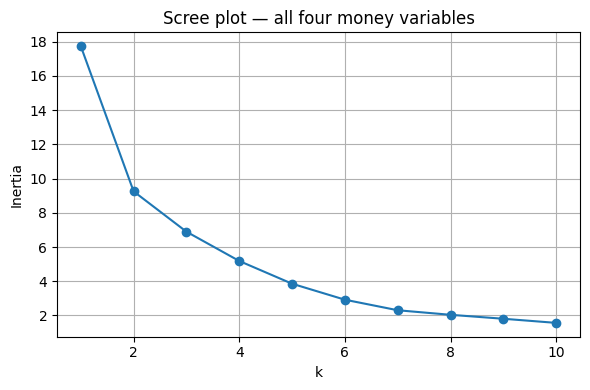


=== k = 3 ===
Cluster centers (approx $, rounded):
       Raised       Spent  Cash on Hand     Debts
0   2198050.0   1759090.0     1193418.0   85242.0
1  16187350.0  12735235.0     8531495.0  775406.0
2  59609692.0  49189005.0    16873558.0       0.0


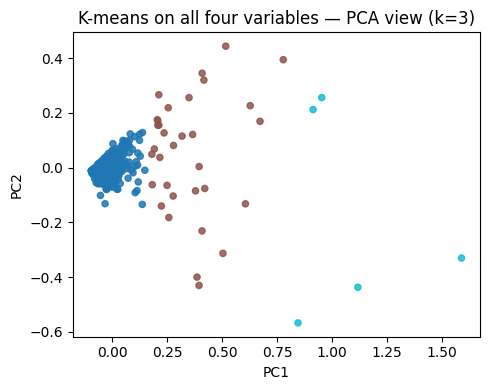


Cluster sizes:
          size
cluster      
2           5
1          33
0         499

Members in the two smallest clusters:
                  Member     Raised      Spent  Cash on Hand      Debts  cluster
             Adam Schiff 20993041.0 13957854.0    20942888.0        0.0        1
            Alex Padilla 11253771.0  3870947.0     7617654.0     5703.0        1
Alexandria Ocasio-Cortez 11326505.0  9411406.0     5940454.0        0.0        1
          Bernie Sanders 14074831.0 11331428.0     9751125.0        0.0        1
  Catherine Cortez Masto 37993811.0 35928936.0     5089745.0        0.0        1
             Cory Booker  5794554.0  4010634.0     7671026.0        0.0        1
             David Trone 12990741.0  6878050.0     6206371.0 13302000.0        1
              Jim Jordan 12417107.0  9675701.0     8855217.0        0.0        1
             Joe Manchin  7790164.0   835794.0     9414431.0        0.0        1
            John Kennedy 28119082.0 18276565.0    15530074.0    

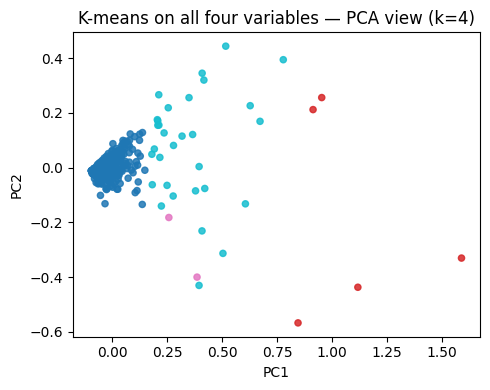


Cluster sizes:
          size
cluster      
2           2
1           5
3          31
0         499

Members in the two smallest clusters:
         Member     Raised      Spent  Cash on Hand      Debts  cluster
  Chuck Schumer 35899966.0 25944350.0    20231213.0        0.0        1
     Mark Kelly 73140886.0 61357281.0    13186127.0        0.0        1
Raphael Warnock 86581469.0 75959810.0    22762985.0        0.0        1
      Tim Scott 37743256.0 23876921.0    21539824.0        0.0        1
    Val Demings 64682883.0 58806664.0     6647641.0        0.0        1
    David Trone 12990741.0  6878050.0     6206371.0 13302000.0        2
    Ron Johnson 27680901.0 23731653.0     4508581.0 11759857.0        2

=== k = 6 ===
Cluster centers (approx $, rounded):
       Raised       Spent  Cash on Hand       Debts
0   1830162.0   1510575.0      881143.0     90618.0
1  19247499.0  12535655.0    16766618.0         0.0
2  20335821.0  15304852.0     5357476.0  12530928.0
3  74801746.0  65374585.

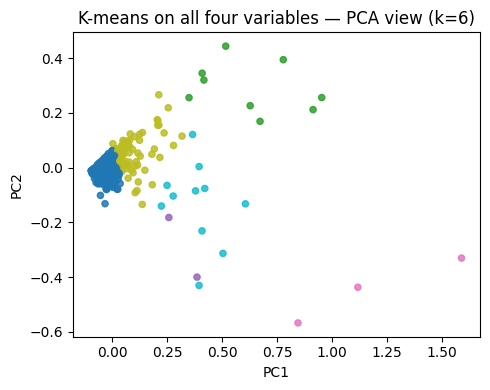


Cluster sizes:
          size
cluster      
2           2
3           3
1           9
5          11
4          73
0         439

Members in the two smallest clusters:
         Member     Raised      Spent  Cash on Hand      Debts  cluster
    David Trone 12990741.0  6878050.0     6206371.0 13302000.0        2
    Ron Johnson 27680901.0 23731653.0     4508581.0 11759857.0        2
     Mark Kelly 73140886.0 61357281.0    13186127.0        0.0        3
Raphael Warnock 86581469.0 75959810.0    22762985.0        0.0        3
    Val Demings 64682883.0 58806664.0     6647641.0        0.0        3

=== k = 8 ===
Cluster centers (approx $, rounded):
       Raised       Spent  Cash on Hand       Debts
0   1633441.0   1415503.0      713381.0     98055.0
1   8278835.0   4931357.0     8656596.0     24522.0
2  25161285.0  16794297.0    18571082.0         0.0
3  20335821.0  15304852.0     5357476.0  12530928.0
4  86581469.0  75959810.0    22762985.0         0.0
5  26694950.0  24309884.0     563540

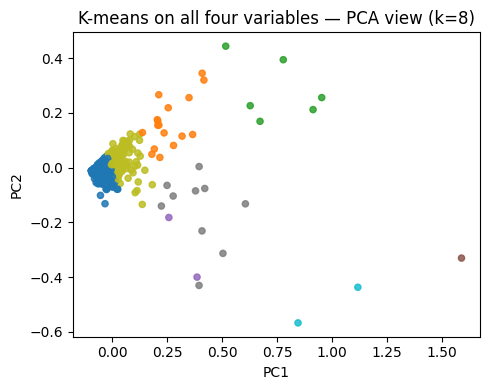


Cluster sizes:
          size
cluster      
4           1
3           2
7           2
2           6
5          10
1          17
6         110
0         389

Members in the two smallest clusters:
         Member     Raised      Spent  Cash on Hand      Debts  cluster
    David Trone 12990741.0  6878050.0     6206371.0 13302000.0        3
    Ron Johnson 27680901.0 23731653.0     4508581.0 11759857.0        3
Raphael Warnock 86581469.0 75959810.0    22762985.0        0.0        4


In [50]:
# Q2.4 Use k means clustering with all four numeric variables
cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
d4 = df_money.dropna(subset=cols).copy()
X = d4[cols].to_numpy()

# Keep mins/maxes to convert cluster centers back to dollars
col_min = d4[cols].min().to_numpy()
col_max = d4[cols].max().to_numpy()
rng = (col_max - col_min)

# Min–max scale to [0,1] for k-means
X_scaled = minmax_scale(X)

# Scree plot to choose k
inertias = [KMeans(n_clusters=k, n_init=50, random_state=42).fit(X_scaled).inertia_
            for k in range(1, 11)]

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Scree plot — all four money variables')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.grid(True); plt.tight_layout(); plt.show()

# Print members in the two smallest clusters
def show_smallest_two(dframe, labels, cols_show):
    tmp = dframe.copy()
    tmp['cluster'] = labels
    sizes = tmp['cluster'].value_counts().sort_values()
    print("\nCluster sizes:\n", sizes.to_frame('size'))
    smallest_ids = list(sizes.index[:2])
    who = (tmp[tmp['cluster'].isin(smallest_ids)]
           [[ 'Member'] + cols_show + ['cluster']]
           .sort_values(['cluster', 'Member']))
    print("\nMembers in the two smallest clusters:")
    print(who.to_string(index=False))

# Fit several k's, visualize (PCA) & list smallest clusters
pca2 = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

for k in [3, 4, 6, 8]:
    km = KMeans(n_clusters=k, n_init=50, random_state=42).fit(X_scaled)
    labels = km.labels_
    centers_scaled = km.cluster_centers_
    centers_orig = centers_scaled * rng + col_min
    centers_df = pd.DataFrame(centers_orig, columns=cols).round(0)
    print(f"\n=== k = {k} ===")
    print("Cluster centers (approx $, rounded):")
    print(centers_df)

    # PCA scatter so all four variables influence the view
    plt.figure(figsize=(5,4))
    plt.scatter(pca2[:,0], pca2[:,1], c=labels, s=20, alpha=0.85, cmap='tab10')
    plt.title(f'K-means on all four variables — PCA view (k={k})')
    plt.xlabel('PC1'); plt.ylabel('PC2'); plt.tight_layout(); plt.show()

    # List members of the two smallest clusters
    show_smallest_two(d4, labels, cols_show=cols)

Using all four money variables (Raised, Spent, Cash on Hand, and Debts_ provides nearly the same picture as the earlier two analyses. The scree plot shows an elbow around k = 3–4. At k = 3 there is one huge low-money cluster, a mid-level group, and a very small set of extreme campaigns. Moving to k = 4 cleanly separates the tiny outliers into two groups, one with very high cash and little debt and another with heavy debt. Higher k values just split the middle cluster without revealing new patterns. Adding all four variables makes the difference between cash-rich and debt-heavy races clearer.

In [ ]:
# Q2.5 Did the k-MC algorithm find useful patterns for you in analyzing the election?

Yes. k-means gave a clear big-picture of 2022 races. It separated a large group of low-fundraising campaigns from a small set of high-money outliers and flagged unusual cases with very high cash or high debt. That matches expectations: most campaigns are modest; a few Senate battles move tens of millions.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?